In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.dates as mdates

# Importação dos dados de covid no Pará
Os dados foram coletados manualmente e portanto podem estar desatualizados

In [2]:
uri = 'https://raw.githubusercontent.com/fellypesb/covid-19/master/Dataset/casos_diarios_para.csv'
c_para = pd.read_csv(uri)

In [3]:
total_casos = c_para['Casos_total'].to_numpy() # Conversão para array
obitos = c_para['Obitos'].to_numpy() # Conversão para array
letalidade1 = c_para['Letalidade'][:len(c_para)-10].to_numpy() # Conversão para array
#len(total_casos), len(obitos), len(letalidade1)

# Nova letalidade ajustada
A taxa de letalidade ou mortalidade é a razão entre número de óbitos e casos confirmados. Considera-se uma grande incerteza desta, devido diversas variações no mundo todo. A nova taxa de letalidade é ajustada a partir de um deslocamento temporal entre o registro de óbitos e a confirmação de casos, seguindo um alerta publicado no [The Lancet]('https://doi.org/10.1016/S1473-3099(20)30195-X'), porém adaptado para o Brasil a 10 dias, dado que os testes têm sido realizados já em processo de agravamento da doenças e não nos sintomas iniciais.

In [4]:
letalidade2 = []
delay = 10
for i in range(len(c_para)-delay):
    try:
        x = round((obitos[i+delay] / total_casos[i])*100, 2)
        letalidade2.append(x)
    except ZeroDivisionError:
        letalidade2.append(0)
len(letalidade2) == len(c_para)-10

/home/fellypesb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


True

# Plot das letalidades

In [5]:
datas =pd.date_range('03 17 2020', periods=len(letalidade2), freq='D')
datas_ = []
for i in range(0,len(letalidade2),4):
    datas_.append(datas[i])
    #print(datas[i])

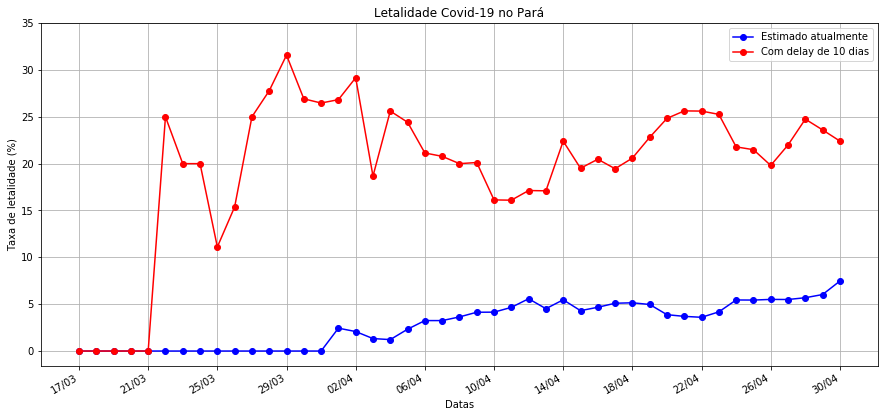

In [6]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Letalidade Covid-19 no Pará')
plt.plot_date(x=datas, y=letalidade1, label='Estimado atualmente', fmt='b-o')
plt.plot_date(x=datas, y=letalidade2, label='Com delay de 10 dias', fmt='r-o')
plt.xlabel('Datas')
plt.ylabel('Taxa de letalidade (%)')
plt.xticks(datas_)
plt.yticks(range(0, 40, 5))
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(True)
plt.legend()
plt.show()